# **Name - PRABHAKAR KUMAR**
# **Roll - IRM2017008**
# **Heart Disease Classifier using SVM(SMO) with RBF Kernel**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

## Data Preparation

In [38]:
data = pd.DataFrame(pd.read_csv('dataset.csv',delimiter=','))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  class     303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [39]:
row_count = len(data.index)
print(row_count)

303


In [40]:
X=data[['age','trestbps']].values

In [41]:
print(X)

[[ 63. 145.]
 [ 67. 160.]
 [ 67. 120.]
 [ 37. 130.]
 [ 41. 130.]
 [ 56. 120.]
 [ 62. 140.]
 [ 57. 120.]
 [ 63. 130.]
 [ 53. 140.]
 [ 57. 140.]
 [ 56. 140.]
 [ 56. 130.]
 [ 44. 120.]
 [ 52. 172.]
 [ 57. 150.]
 [ 48. 110.]
 [ 54. 140.]
 [ 48. 130.]
 [ 49. 130.]
 [ 64. 110.]
 [ 58. 150.]
 [ 58. 120.]
 [ 58. 132.]
 [ 60. 130.]
 [ 50. 120.]
 [ 58. 120.]
 [ 66. 150.]
 [ 43. 150.]
 [ 40. 110.]
 [ 69. 140.]
 [ 60. 117.]
 [ 64. 140.]
 [ 59. 135.]
 [ 44. 130.]
 [ 42. 140.]
 [ 43. 120.]
 [ 57. 150.]
 [ 55. 132.]
 [ 61. 150.]
 [ 65. 150.]
 [ 40. 140.]
 [ 71. 160.]
 [ 59. 150.]
 [ 61. 130.]
 [ 58. 112.]
 [ 51. 110.]
 [ 50. 150.]
 [ 65. 140.]
 [ 53. 130.]
 [ 41. 105.]
 [ 65. 120.]
 [ 44. 112.]
 [ 44. 130.]
 [ 60. 130.]
 [ 54. 124.]
 [ 50. 140.]
 [ 41. 110.]
 [ 54. 125.]
 [ 51. 125.]
 [ 51. 130.]
 [ 46. 142.]
 [ 58. 128.]
 [ 54. 135.]
 [ 54. 120.]
 [ 60. 145.]
 [ 60. 140.]
 [ 54. 150.]
 [ 59. 170.]
 [ 46. 150.]
 [ 65. 155.]
 [ 67. 125.]
 [ 62. 120.]
 [ 65. 110.]
 [ 44. 110.]
 [ 65. 160.]
 [ 60. 125.]

In [42]:
y=data.iloc[:,-1:]

In [43]:
print(y)

     class 
0         0
1         1
2         1
3         0
4         0
..      ...
298       1
299       1
300       1
301       1
302       0

[303 rows x 1 columns]


In [44]:
print(type(X))

<class 'numpy.ndarray'>


In [45]:
print(X.shape)

(303, 2)


In [46]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [47]:
y=y.to_numpy()

In [48]:
print(type(y))

<class 'numpy.ndarray'>


In [49]:
print(y.shape)

(303, 1)


In [50]:
y=np.squeeze(y)
print(y.shape)

(303,)


In [51]:
for i in range(row_count):
  if(y[i]==0):
    y[i]=-1

In [52]:
print(y)

[-1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1
  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1
 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1
  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1
 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1  1
  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1
 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1
  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1  1 -1
 -1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1]


## Splitting data into 70:30 split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
print(X_train.shape)
print(X_test.shape)

(212, 2)
(91, 2)


## Defining SVM class with Training steps an Kernel implementations

In [56]:
class SVM():

    def __init__(self, max_iter=10000, kernel_type='linear', C=1.0, gamma = 1,epsilon=0.001):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic,
            'rbf' : self.kernel_rbf
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.gamma = gamma
        self.epsilon = epsilon
    
    def fit(self, X, y):
        
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            
            for j in range(0, n):
                i = self.get_random_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                if self.kernel_type == 'rbf':
                    k_ij = kernel(x_i, x_i, self.gamma) + kernel(x_j, x_j, self.gamma) - 2 * kernel(x_i, x_j, self.gamma)
                else:
                    k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                L, H = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = min(max(alpha[j], L), H)       # Clipping
                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])

            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break

            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        return support_vectors, count
    
    def predict(self, X):
        return self.h(X, self.w, self.b)
    
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    
    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))
    
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
    
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j)
        else:
            return max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j)
    
    def get_random_int(self, a, b, z):
        i = z
        cnt=0
        while cnt<1000:
            i = random.randint(a,b)
            if i != z :
                break
            cnt=cnt+1
        return i
    
    # Define kernels
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)
    
    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)
    
    def kernel_rbf(self, x1, x2, gamma = 1):
        diff = ((np.linalg.norm(x1 - x2)) ** 2) / (2 * gamma * gamma)
        return np.exp(- diff)

In [57]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == -1 and predictions[i] == -1)
        false_pos += int(labels[i] == -1 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == -1)
    return true_pos, false_pos, true_neg, false_neg

In [60]:

def calculate(C=1.0,kernel='linear',gamma=1):
    model = SVM(C=C,kernel_type=kernel,gamma=gamma)
    support_vectors, iterations = model.fit(X_train, y_train)
    sv_count = support_vectors.shape[0]
    
    X = X_test
    y = y_test
    
    y_pred = model.predict(X)
    TP, FP, TN, FN = metrics(y, y_pred)

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    print("Support vector count: %d" % (sv_count))
    print("Converged after %d iterations" % (iterations))
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)
    return y, y_pred

In [61]:

def plot_roc(y,y_pred):
    import sklearn.metrics as metrics
    fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    print('AUC: ', roc_auc)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## C = 1
## Gamma = 1
## Accuracy = 0.5494505494505495

Support vector count: 156
Converged after 12 iterations
Precision:  0.5135135135135135
Recall:  0.4523809523809524
F-score:  0.48101265822784806
Accuracy:  0.5494505494505495
AUC:  0.5425170068027211


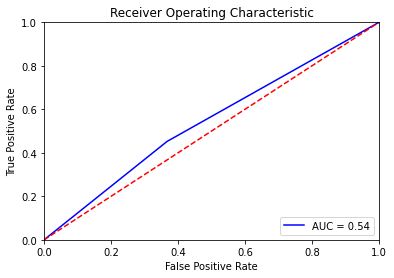

In [62]:
y, y_pred = calculate(kernel='rbf',C=1.0,gamma=1)
plot_roc(y,y_pred)

## C = 1
## Gamma = 25
## Accuracy = 0.5714285714285714

Support vector count: 154
Converged after 11 iterations
Precision:  0.5428571428571428
Recall:  0.4523809523809524
F-score:  0.49350649350649345
Accuracy:  0.5714285714285714
AUC:  0.5629251700680272


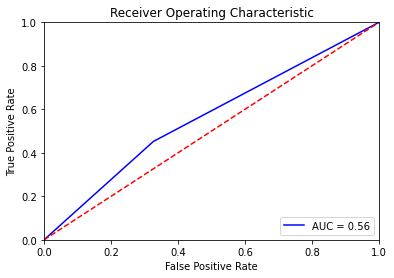

In [63]:
y, y_pred = calculate(kernel='rbf',C=1.0,gamma=25)
plot_roc(y,y_pred)

## C = 1
## Gamma = 100
## Accuracy = 0.5604395604395604

Support vector count: 162
Converged after 11 iterations
Precision:  0.525
Recall:  0.5
F-score:  0.5121951219512195
Accuracy:  0.5604395604395604
AUC:  0.5561224489795918


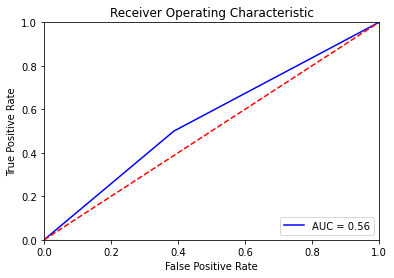

In [64]:
y, y_pred = calculate(kernel='rbf',C=1.0,gamma=100)
plot_roc(y,y_pred)

## C = 10
## Gamma = 25
## Accuracy = 0.5934065934065934

Support vector count: 194
Converged after 15 iterations
Precision:  0.5555555555555556
Recall:  0.5952380952380952
F-score:  0.574712643678161
Accuracy:  0.5934065934065934
AUC:  0.5935374149659864


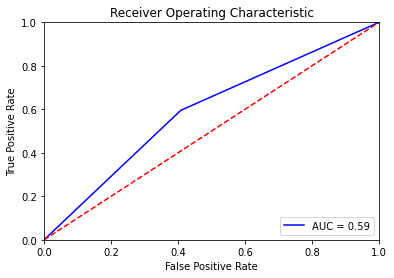

In [65]:

y, y_pred = calculate(kernel='rbf',C=10.0,gamma=25)
plot_roc(y,y_pred)

## C = 10
## Gamma = 100
## Accuracy = 0.5934065934065934

Support vector count: 169
Converged after 13 iterations
Precision:  0.5531914893617021
Recall:  0.6190476190476191
F-score:  0.5842696629213483
Accuracy:  0.5934065934065934
AUC:  0.5952380952380952


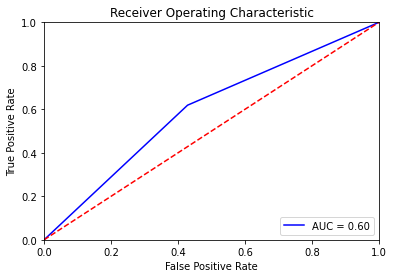

In [66]:
y, y_pred = calculate(kernel='rbf',C=10.0,gamma=100)
plot_roc(y,y_pred)